<a href="https://colab.research.google.com/github/evacragnolino/Data-Science-Foundations/blob/main/Unit_6_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What wins a NCAA Title?**
(in the 3k)

The indoor 3k is an intresting event because it is the last distance event which means not a lot of people scratch it because it doesn't interfere with other events the atheletes may have qualified for. This means that a mix of mile runners, 5k runners, DMR runners and runners who have opted to be fresh for the 3k are all running it which makes for an intresting race. The flat 3k is also only ran indoors and not on the outdoor track.

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 6.1 MB/s eta 0:00:00


In [3]:
import bambi as bmb

In [4]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

In [5]:
threeK = pd.read_csv('https://raw.githubusercontent.com/evacragnolino/Data-Science-Foundations/main/Unit%206%20data%20sheet%20-%20Sheet1%20(3).csv')

In [6]:
threeK

,place,name,eligibility,school,time,year,prior experiece,three k PR,mile PR,conf. result
0,1,Ceili McCabe,SR-4,West Virginia,9:01.18,2025,2,8:45.97,4:29.26,1.0
1,2,Doris Lemngole,SO-2,Alabama,9:01.64,2025,1,8:41.83,4:36.80,1.0
2,3,Lexy Halladay-Lowry,SR-4,BYU,9:03.20,2025,2,8:40.60,4:31.89,1.0
3,4,Amina Maatoug,SR-4,Washington,9:03.34,2025,2,8:46.20,4:26.39,1.0
4,5,Grace Hartman,SO-2,NC State,9:03.37,2025,2,8:46.57,4:24.76,4.0
...,...,...,...,...,...,...,...,...,...,...
98,11,Alsu Bogdanova,SR-4,Eastern Michigan,9:12.81,2018,0,9:05.81,4:41.15,2.0
99,12,Amy-Eloise Neale,SR-4,Washington,9:20.24,2018,1,9:01.96,4:34.15,7.0
100,13,Erin Clark,SR-4,Colorado,9:21.07,2018,2,9:05.72,4:48.06,2.0
101,14,Elinor Purrier,SR-4,New Hampshire,9:25.93,2018,3,8:55.68,4:26.55,1.0


My data is data from the 2018 NCAA indoor championships to the 2025 championships and includes the athlete, their school and their eligibility along with their 3k PR, their mile PR, their best result from the conference meet and their prior experience which is the years they have competed in past NCAA 3k finals.

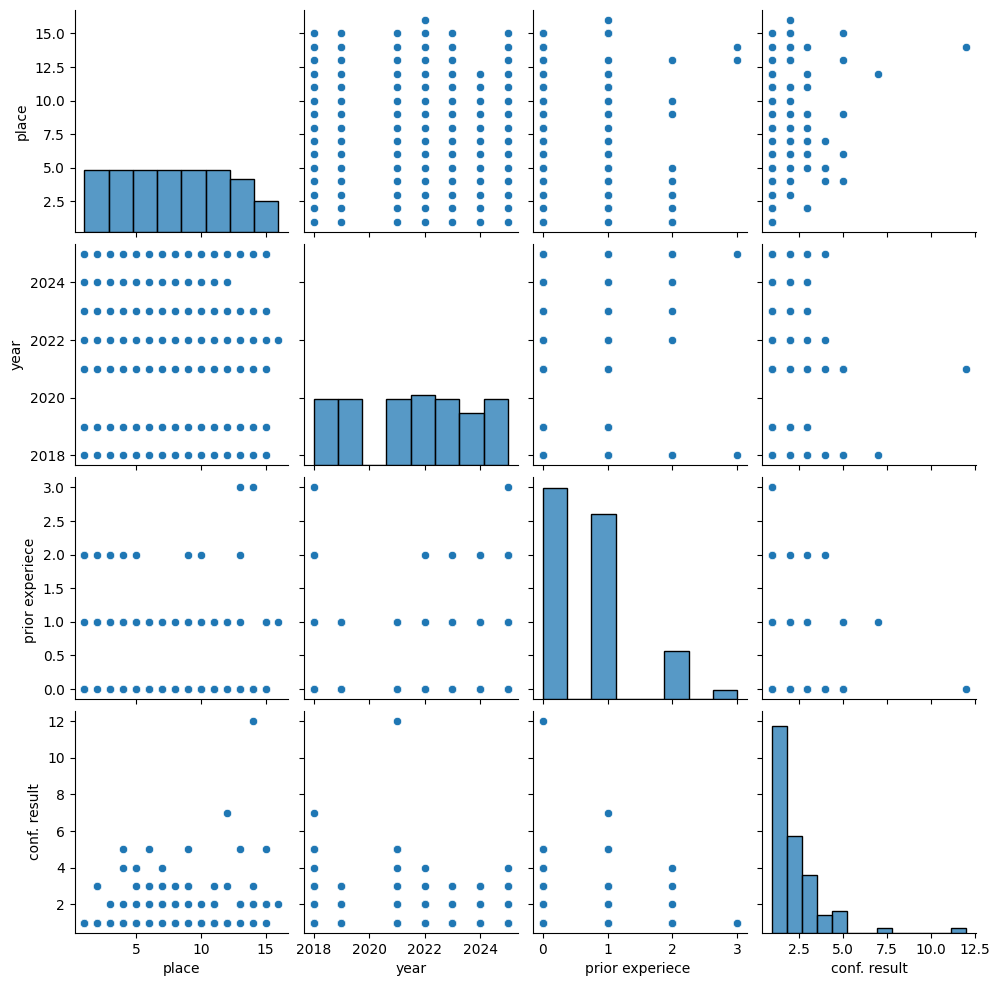

In [7]:
sns.pairplot(threeK)

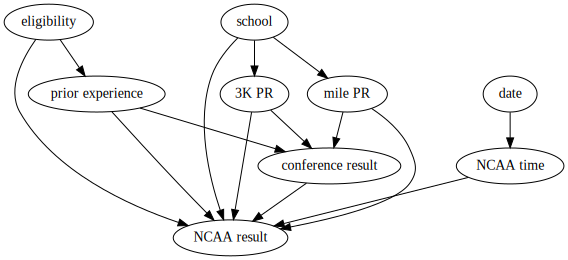

In [8]:
dag_b = gv.Digraph(comment='threeK_dag') #b for bikes

dag_b.node('Y', 'eligibility')
dag_b.node('P','prior experience')
dag_b.node('N','NCAA result')
dag_b.node('S', 'school')
dag_b.node('E','date')
dag_b.node('T','NCAA time')
dag_b.node('K', '3K PR')
dag_b.node('M','mile PR')
dag_b.node('C','conference result')

dag_b.edges(['YN', 'YP','PC','PN','SK','SM','SN','KC','MC','KN','MN','CN','TN','ET'])

dag_b


talk about why you chose each variable in the data set to cause what

In [9]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

threeK = pd.read_csv('https://raw.githubusercontent.com/evacragnolino/Data-Science-Foundations/main/Unit%206%20data%20sheet%20-%20Sheet1%20(3).csv')

# Display the head of the DataFrame immediately after loading to check its content
print("DataFrame head after loading (original columns):")
print(threeK.head())
print("Original Columns:", threeK.columns.tolist())

# Standardize column names: strip whitespace, replace spaces with underscores, make lowercase
def clean_col_name(col_name):
    return col_name.strip().lower().replace(' ', '_').replace('.', '')

threeK.columns = [clean_col_name(col) for col in threeK.columns]

# Further specific renames/corrections after general cleaning
# Fix typo 'experiece' to 'experience' and standardize 'three_k_pr' to 'pr_3k', 'mile_pr' to 'mile_PR'
threeK.rename(columns={'prior_experiece': 'prior_experience', 'three_k_pr': 'pr_3k', 'mile_pr': 'mile_PR'}, inplace=True)

print("Columns after cleaning and specific renames:", threeK.columns.tolist())
print("DataFrame head after column cleaning:")
print(threeK.head())

# Function to convert time strings (MM:SS.ms) to total seconds
def convert_time_to_seconds(time_str):
    if pd.isna(time_str): # Handle NaN values if any before conversion
        return np.nan
    parts = str(time_str).split(':')
    if len(parts) == 2:
        minutes = float(parts[0])
        seconds_ms_str = parts[1]
        if '.' in seconds_ms_str:
            seconds_parts = seconds_ms_str.split('.')
            seconds = float(seconds_parts[0])
            milliseconds = float(seconds_parts[1]) / (10**(len(seconds_parts[1])))
            total_seconds = minutes * 60 + seconds + milliseconds
        else:
            total_seconds = minutes * 60 + float(seconds_ms_str)
        return total_seconds
    return np.nan # Return NaN for unparseable formats

# Apply the custom function to convert 'pr_3k' column to total seconds
threeK['pr_3k'] = threeK['pr_3k'].apply(convert_time_to_seconds)

# Apply the custom function to convert 'time' column to total seconds
threeK['time'] = threeK['time'].apply(convert_time_to_seconds)

# Convert 'place' and 'conf_result' to numeric as well
threeK['place'] = pd.to_numeric(threeK['place'], errors='coerce')
threeK['conf_result'] = pd.to_numeric(threeK['conf_result'], errors='coerce')

# Drop rows with NaNs in all relevant columns to ensure clean data for all models
# Using the new, clean column names
threeK.dropna(subset=['pr_3k', 'place', 'conf_result', 'mile_PR', 'prior_experience', 'eligibility', 'school'], inplace=True)

DataFrame head after loading (original columns):
   place                 name eligibility         school     time  year  \
0      1         Ceili McCabe        SR-4  West Virginia  9:01.18  2025   
1      2       Doris Lemngole        SO-2        Alabama  9:01.64  2025   
2      3  Lexy Halladay-Lowry        SR-4            BYU  9:03.20  2025   
3      4        Amina Maatoug        SR-4     Washington  9:03.34  2025   
4      5        Grace Hartman        SO-2       NC State  9:03.37  2025   

   prior experiece  three k PR  mile PR    conf. result  
0                 2     8:45.97   4:29.26           1.0  
1                 1     8:41.83   4:36.80           1.0  
2                 2     8:40.60   4:31.89           1.0  
3                 2     8:46.20   4:26.39           1.0  
4                 2     8:46.57   4:24.76           4.0  
Original Columns: ['place', 'name', 'eligibility', 'school', 'time', 'year', 'prior experiece ', 'three k PR ', 'mile PR  ', 'conf. result']
Columns aft

In [10]:
#we put the priors that aren't normal or half normal with mean 0 and sigma 1
#in a dict
priors ={"pr_3k" : bmb.Prior("Normal", mu=0,sigma=10), "sigma" : bmb.Prior("HalfNormal",sigma=10)}

#This creates a skeleton of the model; it hasn't run MCMC or created a posterior yet
model_g3k_bmb = bmb.Model("place ~ pr_3k", threeK, family = "gaussian", priors=priors)

In [11]:
model_g3k_bmb


       Formula: place ~ pr_3k
        Family: gaussian
          Link: mu = identity
  Observations: 93
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 7.5161, sigma: 10.7113)
            pr_3k ~ Normal(mu: 0.0, sigma: 10.0)
        
        Auxiliary parameters
            sigma ~ HalfNormal(sigma: 10.0)

In [ ]:
idata_g3k_bmb = model_g3k_bmb.fit(idata_kwargs={"log_likelihood":True})

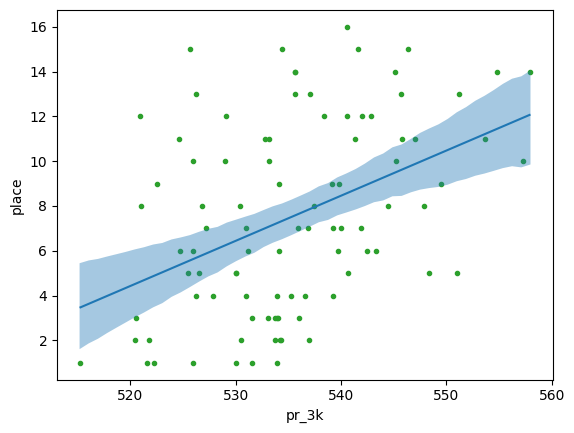

In [13]:
bmb.interpret.plot_predictions(model_g3k_bmb, idata_g3k_bmb, "pr_3k")
plt.plot(threeK.pr_3k, threeK.place, "C2.", zorder=-3)



Text(0.5, 0, '3K PR (minutes:seconds)')

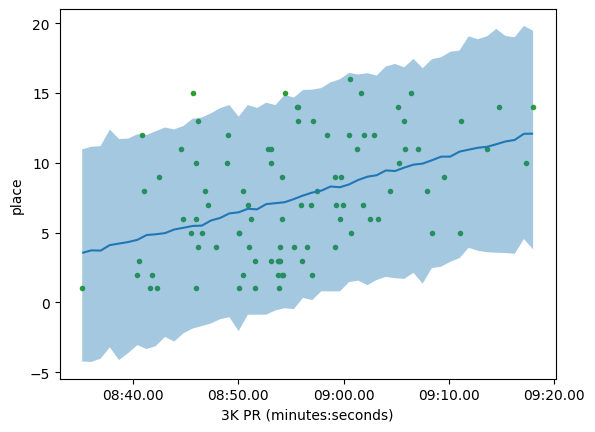

In [14]:
import matplotlib.ticker as mticker

bmb.interpret.plot_predictions(model_g3k_bmb, idata_g3k_bmb, "pr_3k", pps=True)
plt.plot(threeK.pr_3k, threeK.place, "C2.", zorder=-3)

def seconds_to_minutes_seconds(x, pos):
    minutes = int(x // 60)
    seconds = x % 60
    return f"{minutes:02d}:{seconds:05.2f}"

formatter = mticker.FuncFormatter(seconds_to_minutes_seconds)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel("3K PR (minutes:seconds)")
# I used gemini to make my x axis in minutes: seconds so its easier to read

In [ ]:
model_3_conf_bmb = bmb.Model("place ~ pr_3k + conf_result", threeK, family="gaussian")
idata_3_conf_bmb = model_3_conf_bmb.fit(idata_kwargs={"log_likelihood":True})

In [16]:
model_3_conf_bmb

       Formula: place ~ pr_3k + conf_result
        Family: gaussian
          Link: mu = identity
  Observations: 93
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 7.5161, sigma: 641.0437)
            pr_3k ~ Normal(mu: 0.0, sigma: 1.1972)
            conf_result ~ Normal(mu: 0.0, sigma: 6.5882)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 4.2845)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='pr_3k', ylabel='place'>], dtype=object))

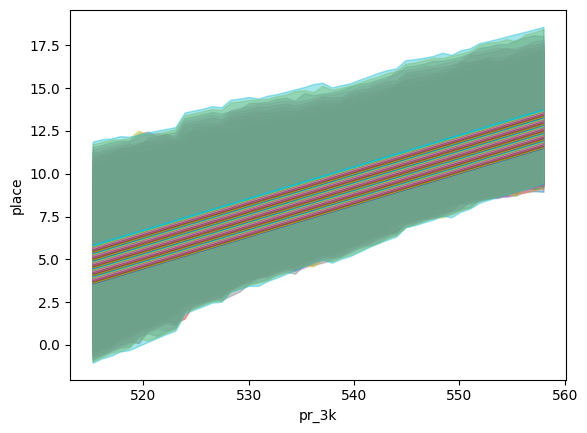

In [17]:
bmb.interpret.plot_predictions(model_3_conf_bmb, idata_3_conf_bmb, ["pr_3k", "conf_result"],

                               # take out subplot
                               legend=False,
                               fig_kwargs={"sharey":True, "sharex":True})

In [18]:
cmp_df_bmb = az.compare( {"multi_lin":idata_g3k_bmb,"single_lin":idata_3_conf_bmb} )
cmp_df_bmb

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
multi_lin,0,-261.062694,2.393977,0.00000,1.0,5.175197,0.000000,False,log
single_lin,1,-261.467774,2.827085,0.40508,0.0,5.169530,0.491115,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

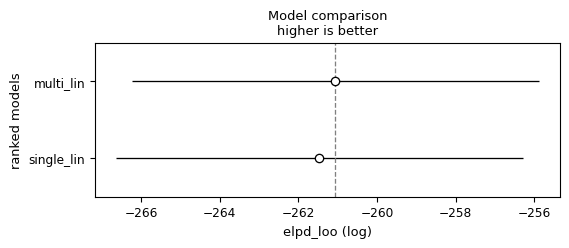

In [19]:
az.plot_compare(cmp_df_bmb)

The multi variable model predicts result at the NCAA championship better!

In [ ]:
threeKallinter = bmb.Model(
    "place ~ pr_3k + conf_result + mile_PR + eligibility + school + prior_experience + pr_3k:conf_result + pr_3k:mile_PR + pr_3k:prior_experience + pr_3k:school + conf_result:mile_PR ",
    threeK, family="gaussian")
idata_threeKallinter = threeKallinter.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
threeKallvars = bmb.Model(
    "place ~ pr_3k + conf_result + mile_PR + eligibility + school + prior_experience",
    threeK, family="gaussian")
idata_threeKallvars = threeKallvars.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
threeK_MCP = bmb.Model(
    "place ~ conf_result + mile_PR + prior_experience",
    threeK, family="gaussian")
idata_threeK_MCP = threeK_MCP.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
threeK_MCPi = bmb.Model(
    "place ~ conf_result + mile_PR + prior_experience + conf_result:mile_PR + conf_result:prior_experience",
    threeK, family="gaussian")
idata_threeK_MCPi = threeK_MCPi.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
threeK_mypick = bmb.Model(
    "place ~ conf_result + mile_PR  + pr_3k + conf_result:mile_PR",
    threeK, family="gaussian")
idata_threeK_mypick = threeK_mypick.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
threeK_SKMi = bmb.Model(
    "place ~ pr_3k + school + mile_PR  + pr_3k:mile_PR + pr_3k:school ",
    threeK, family="gaussian")
idata_threeK_SKMi = threeK_SKMi.fit(idata_kwargs={"log_likelihood":True})

In [31]:
cmp_threeK_bmb = az.compare( {"3k PR":idata_g3k_bmb,"3k + conf.":idata_3_conf_bmb,"allinter":idata_threeKallinter,"allvar":idata_threeKallvars,"mile_conf_experience":idata_threeK_MCP,"mile_conf_experience_i":idata_threeK_MCPi,"mypick_CKPMi":idata_threeK_mypick,"3k_school_mile_i":idata_threeK_SKMi } )
cmp_threeK_bmb

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimat

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
allvar,0,-213.711255,74.961601,0.000000,1.000000e+00,2.672179,0.000000,True,log
3k_school_mile_i,1,-239.874415,68.018638,26.163159,0.000000e+00,3.874872,2.868385,True,log
mile_conf_experience,2,-248.029883,68.950439,34.318627,0.000000e+00,3.110878,3.225052,True,log
allinter,3,-257.577994,83.696391,43.866738,0.000000e+00,1.824624,2.598884,True,log
mypick_CKPMi,4,-260.651765,73.387167,46.940510,0.000000e+00,3.267757,3.209902,True,log
3k PR,5,-261.062694,2.393977,47.351438,0.000000e+00,5.175197,5.585311,False,log
3k + conf.,6,-261.467774,2.827085,47.756518,0.000000e+00,5.169530,5.573259,False,log
mile_conf_experience_i,7,-266.116662,73.580174,52.405407,9.295320e-11,2.487030,3.424565,True,log


I think with a lot of the models that included conference were wourse since some of the atheletes either did not race conference or the conferences vary so much in stregth so its very hard to compare across each one.

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

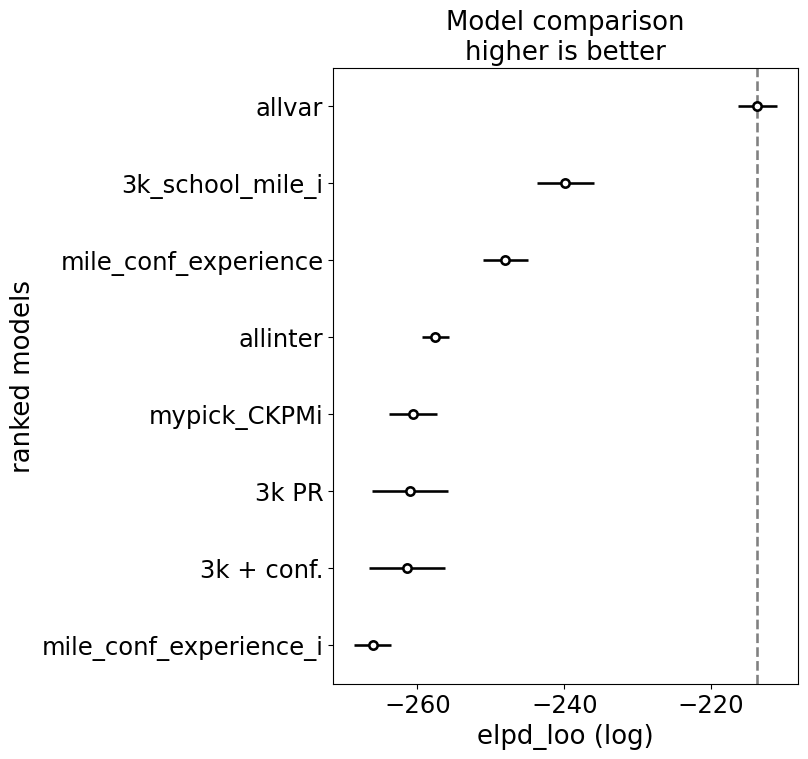

In [32]:
az.plot_compare(cmp_threeK_bmb)

What single variable best predicts placing in the 3k final?

In [33]:
model_mile_bmb = bmb.Model("place ~ mile_PR", threeK, family = "gaussian", priors=priors)
idata_model_mile_bmb = model_mile_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [34]:
model_conf_bmb = bmb.Model("place ~ conf_result", threeK, family = "gaussian", priors=priors)
idata_model_conf_bmb = model_conf_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

In [35]:
model_e_bmb = bmb.Model("place ~ eligibility", threeK, family = "gaussian", priors=priors)
idata_model_e_bmb = model_e_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

In [36]:
model_pre_bmb = bmb.Model("place ~ prior_experience", threeK, family = "gaussian", priors=priors)
idata_model_pre_bmb = model_pre_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

In [37]:
model_school_bmb = bmb.Model("place ~ school", threeK, family = "gaussian", priors=priors)
idata_model_school_bmb = model_school_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [41]:
cmp_threeK_svar_bmb = az.compare( {"3k PR":idata_g3k_bmb," mile.":idata_model_mile_bmb,"conf":idata_model_conf_bmb,"eligibility":idata_model_e_bmb,"prevous experience":idata_model_pre_bmb,"school":idata_model_school_bmb } )
cmp_threeK_svar_bmb

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
mile.,0,-245.556620,65.657340,0.000000,8.954740e-01,4.608525,0.000000,True,log
3k PR,1,-261.062694,2.393977,15.506074,1.045260e-01,5.175197,6.551276,False,log
conf,2,-266.897928,1.938552,21.341307,3.825846e-12,4.419551,5.980461,False,log
prevous experience,3,-269.844813,2.844609,24.288192,3.327109e-12,4.683959,6.116164,False,log
eligibility,4,-270.099160,3.994838,24.542540,2.237819e-12,4.631321,5.636357,False,log
school,5,-285.189943,36.273562,39.633323,0.000000e+00,5.324850,6.239881,True,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

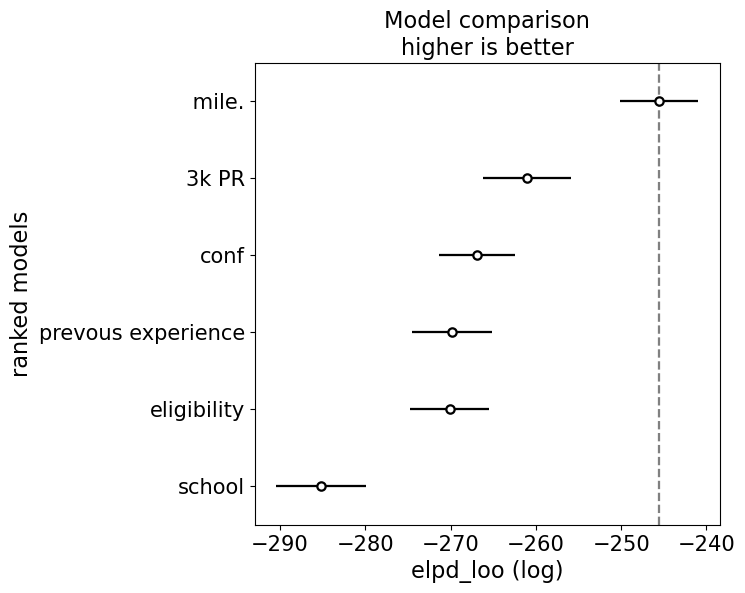

In [42]:
az.plot_compare(cmp_threeK_svar_bmb)